## Diabetes Data Project -Dayanara Lebron Aldea

This data consists of 19 variables on 403 subjects from 1046 subjects who were interviewed in a study to understand the prevalence of obesity, diabetes, and other cardiovascular risk factors in Central Virginia for African Americans. 

This notebook/project focuses on building regression models with glyhb( Glycocolated Hemoglobin) as the response variable greater than 70 as a measure of diabetes. 


## Processing and Exploration of Data 

In [19]:
#1) Read data 
diab<-read.table("diabetes.txt", header=T)
attach(diab)
#NOT WORKING!!!
diab<-droplevels(diab)

#2) Type of variables: glyhb, ratio, bp.1s, age, gender, frame
#glyhb, ratio, bp.1s, age are quantitative variables, and gender and frame are qualitative variables.

str(diab)

ERROR: Error in unlist(str_split(x, "\n"), recursive = FALSE, use.names = FALSE): lazy-load database '/Users/dlaldea/anaconda2/lib/R/library/stringr/R/stringr.rdb' is corrupt


### Pie-charts for qualitative variables


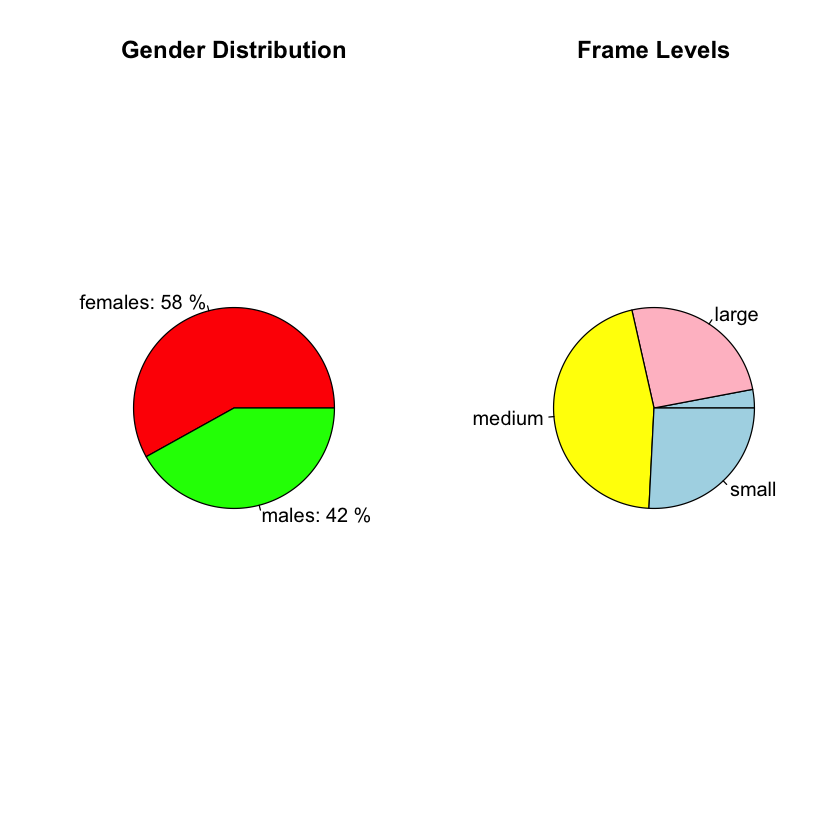

In [9]:
par(mfrow=c(1,2))
n=dim(diab)[1]
pct=round(100*table(diab$gender)/n)
labels=c("females:","males:")
lbls=paste(labels,pct)
lbls=paste(lbls,'%',sep=' ')
pie(table(diab$gender),labels=lbls, col=c("red","green"), main="Gender Distribution")
pie(table(droplevels(diab$frame)),col=c("light blue","pink","yellow"), main="Frame Levels")

###COMMENT ON DISTRIBUTION


### Histograms

[1] "glyhb" "ratio" "bp.1s" "age"

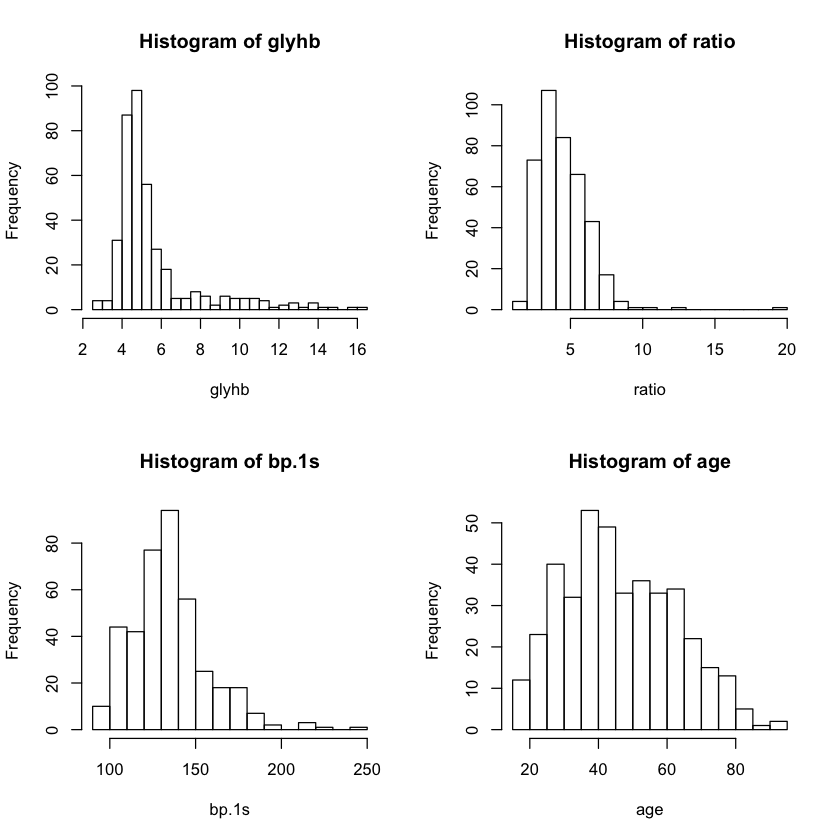

In [3]:
par(mfrow=c(2,2))
hist(glyhb, breaks=20)
hist(ratio, breaks=20)
hist(bp.1s, breaks=20)
hist(age,breaks=20)

#COMMENT ON DISTRIBUTION

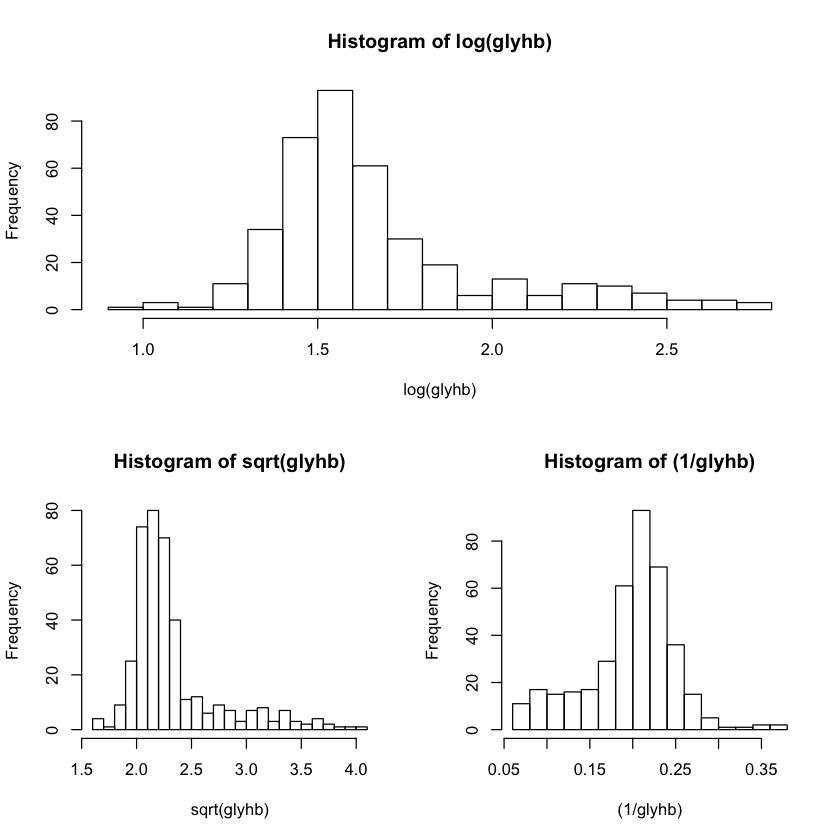

In [4]:
#3)Draw histograms for different transformations 
layout(matrix(c(1,1,2,3), 2, 2, byrow = TRUE))
hist(log(glyhb), breaks=20)
hist(sqrt(glyhb), breaks=20)
hist((1/glyhb),breaks=20)

#1/glybh appears to have a normal distribution
glyhb_tr=(1/glyhb)

### Scatter Plot

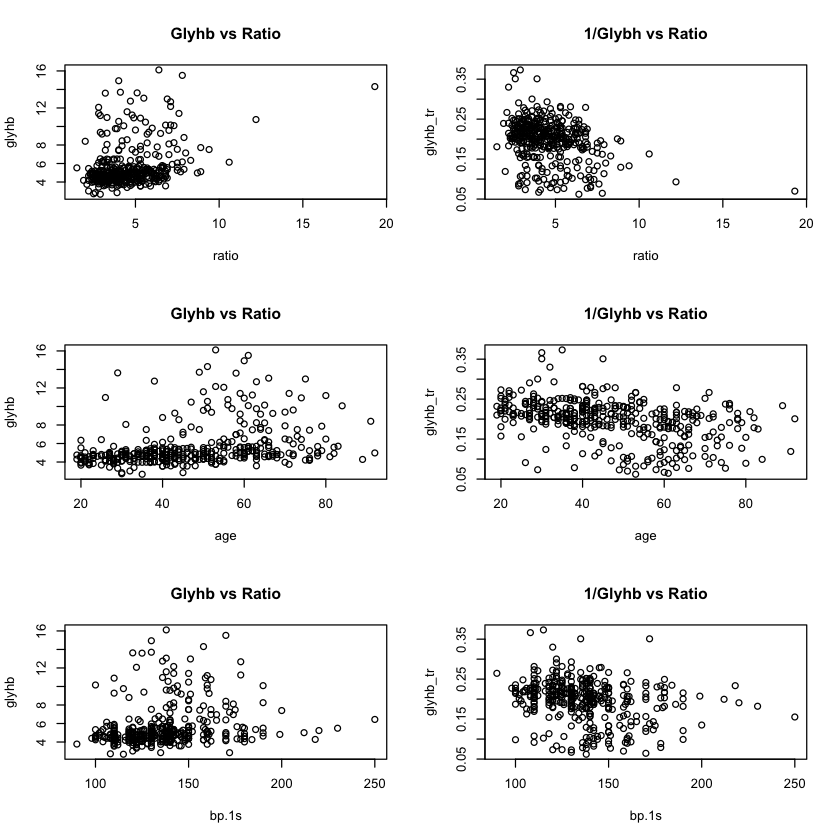

In [17]:
#4)Scatter plot matrix of predictor variables: ratio, bp.1s, age against glybh and glybh_tr
par(mfrow=c(3,2))
qvar=c(ratio,bp.1s,age)
plot(ratio, glyhb, main="Glyhb vs Ratio")
plot(ratio, glyhb_tr, main="1/Glybh vs Ratio")
plot(age, glyhb, main="Glyhb vs Ratio")
plot(age, glyhb_tr, main="1/Glyhb vs Ratio")
plot(bp.1s, glyhb, main="Glyhb vs Ratio")
plot(bp.1s, glyhb_tr, main="1/Glyhb vs Ratio")


###DESCRIPTION!!!!!

### BoxPlots

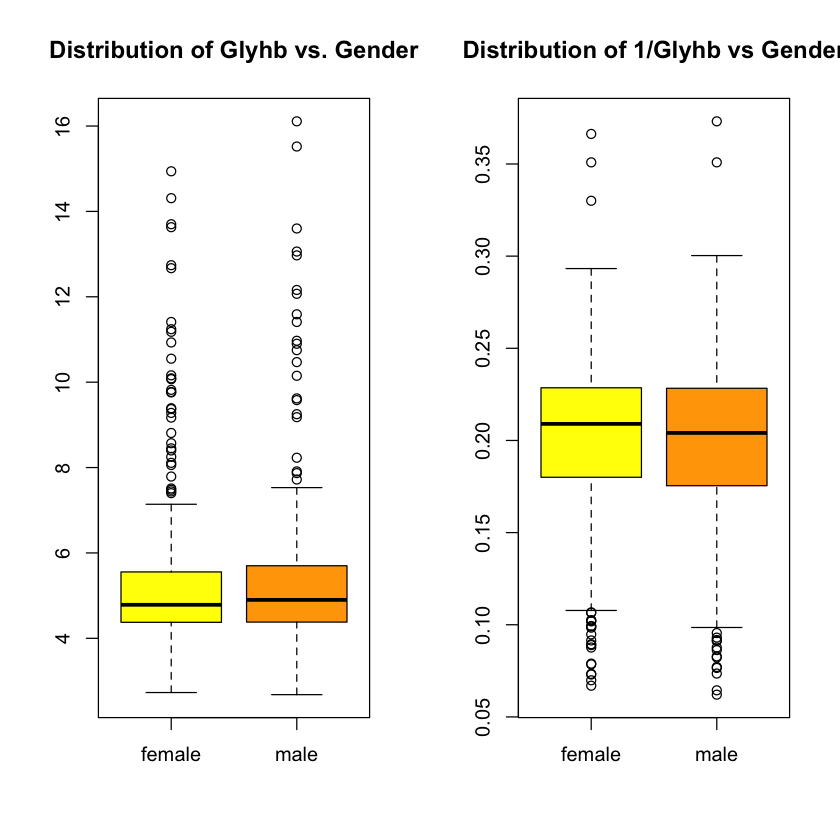

In [5]:
#5) Distribution of glyhb for males and females
par(mfrow=c(1,2))
boxplot(glyhb~gender, col=c("yellow","orange"),main="Distribution of Glyhb vs. Gender")
boxplot(glyhb_tr~gender,col=c("yellow","orange"), main="Distribution of 1/Glyhb vs Gender")

#What do you observe in th boxplots?


## Diagnostic and Remedy


Call:
lm(formula = glyhb ~ bp.1s + age + ratio + gender + frame)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.1969 -1.1401 -0.4592  0.3633  9.5609 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.180628   0.967100   1.221    0.223    
bp.1s        0.003825   0.005118   0.747    0.455    
age          0.036968   0.007254   5.096 5.50e-07 ***
ratio        0.353421   0.062061   5.695 2.49e-08 ***
gendermale  -0.010744   0.216888  -0.050    0.961    
framelarge   0.670850   0.679213   0.988    0.324    
framemedium  0.630213   0.666512   0.946    0.345    
framesmall   0.460518   0.683546   0.674    0.501    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.037 on 376 degrees of freedom
  (19 observations deleted due to missingness)
Multiple R-squared:  0.1971,	Adjusted R-squared:  0.1822 
F-statistic: 13.19 on 7 and 376 DF,  p-value: 3.219e-15


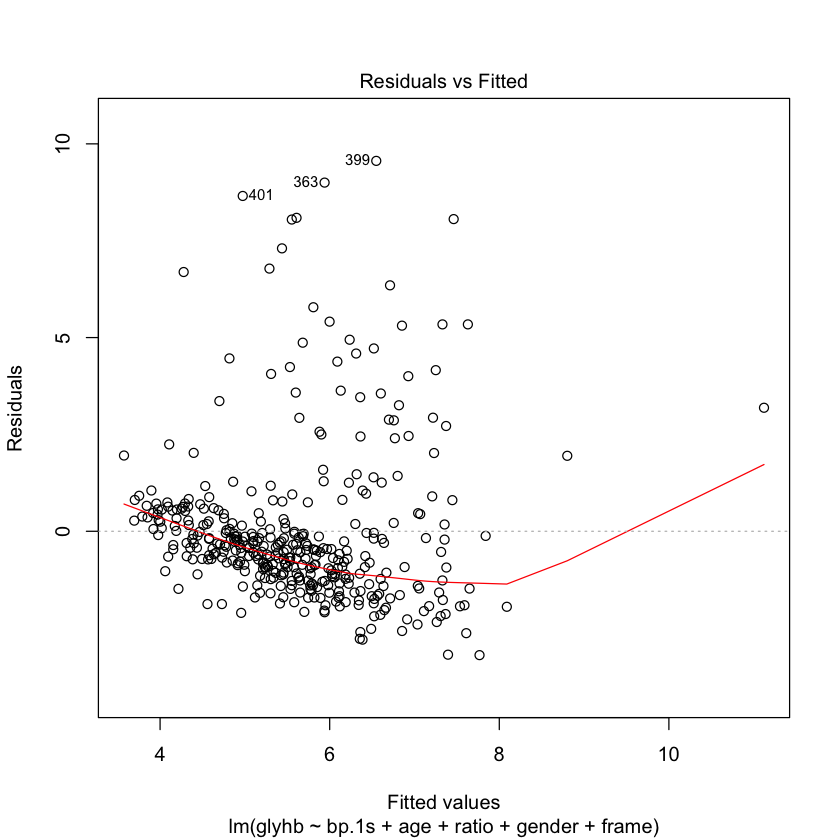

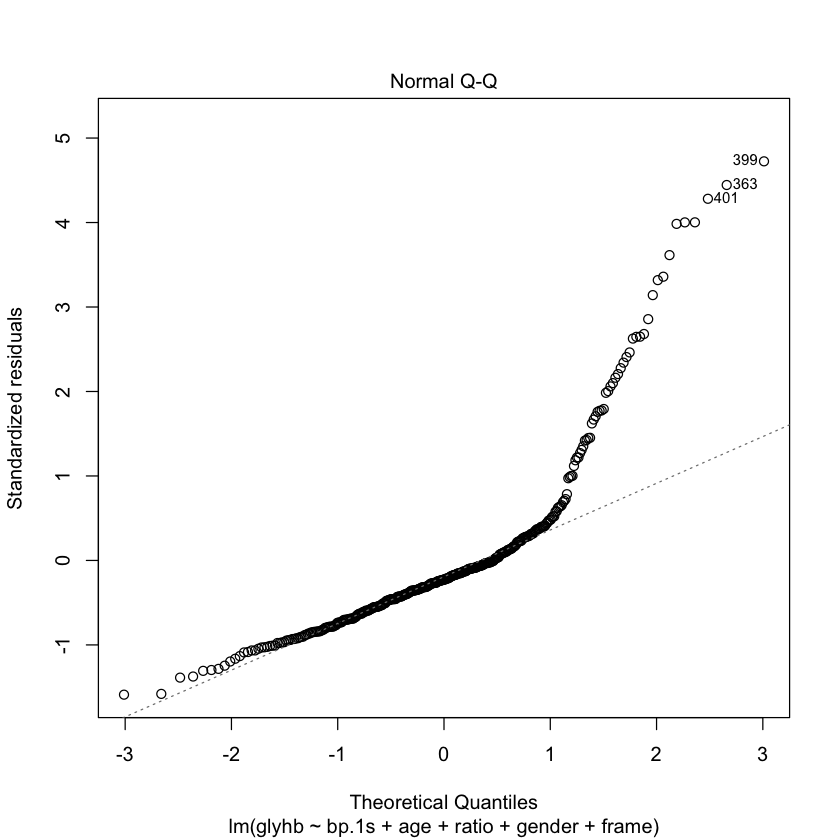

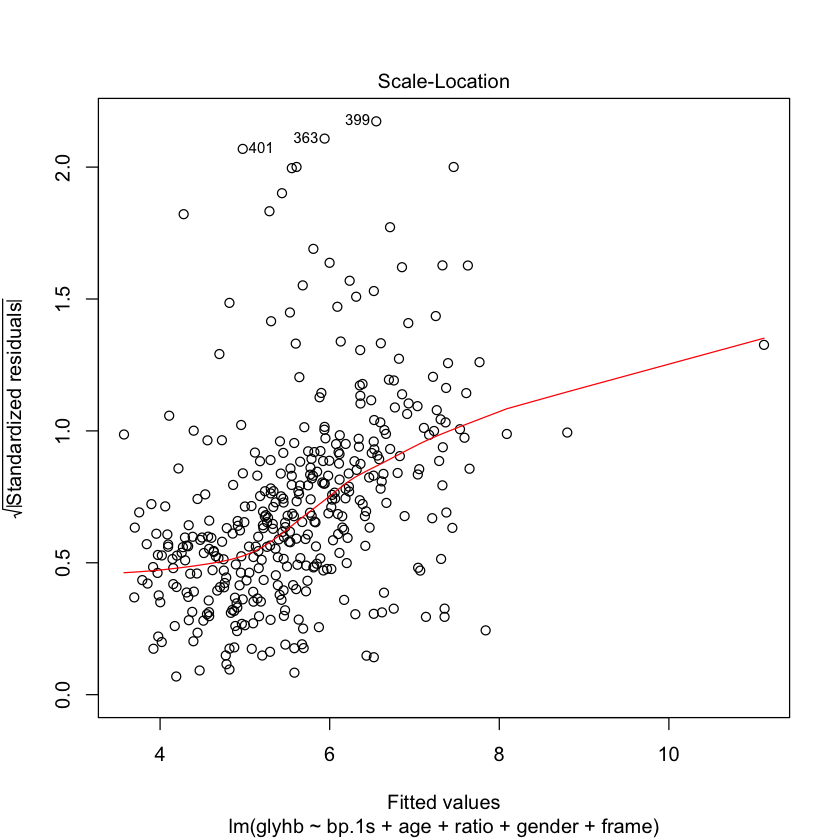

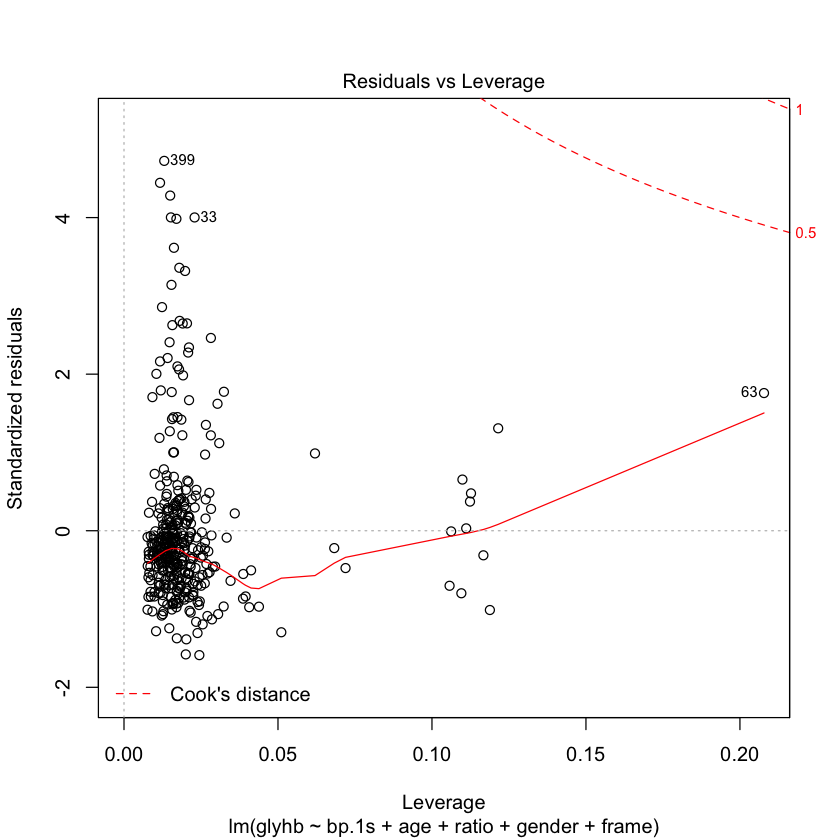

In [27]:
#6) Regression of glyhb to ratio, bp.1s, gender and frame 
mod1<-lm(glyhb~bp.1s+age+ratio+gender+frame)
summary(mod1)

#Residuals qqplot and residuals vs fitted values plots
plot(mod1)

#Do model assumptions hold?
No.

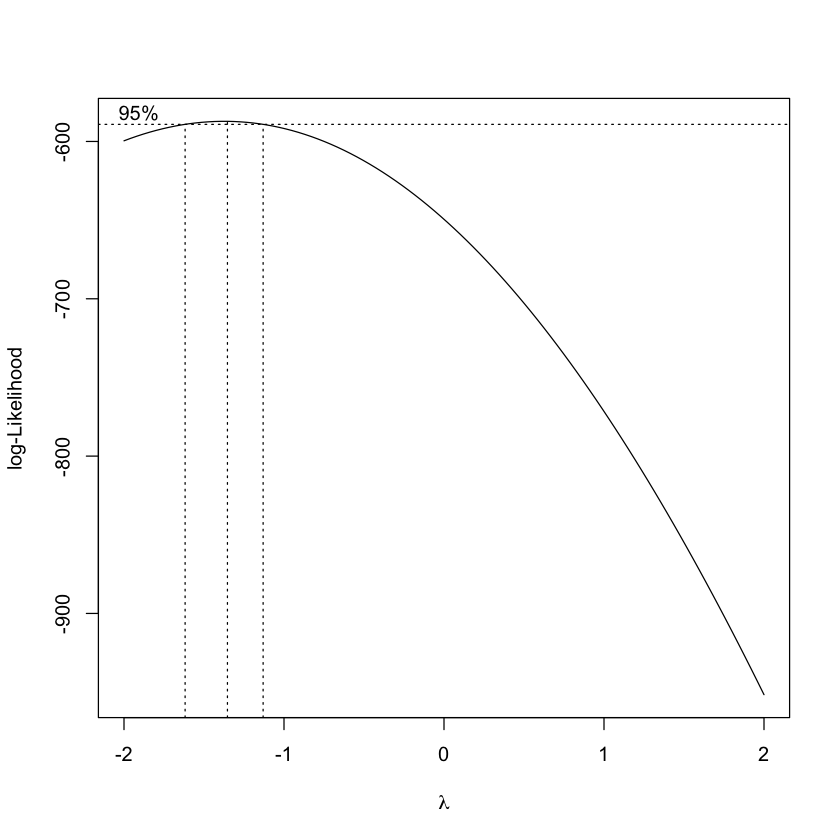

In [34]:
#7 Using box-cox transformation to check what transformation is a good choice
library(MASS)
boxcox(glyhb~bp.1s+age+ratio+gender+frame)

#In this plot the lambda that maximixes the log-likelihood function is about -1.3 we can round this to -1
#our choice of glyhb is correct to be 1/glyhb.

## Building Regression Models

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
bp.1s,1,0.0616437572,0.0616437572,29.81687203,8.645702e-08
age,1,0.1116763281,0.1116763281,54.01745342,1.249695e-12
ratio,1,0.0801677236,0.0801677236,38.77685046,1.271625e-09
frame,3,0.0083091042,0.0027697014,1.33969498,2.611337e-01
gender,1,0.0001825154,0.0001825154,0.08828206,7.665367e-01
Residuals,376,0.7773468887,0.0020674119,NA,NA



Call:
lm(formula = glyhb_tr ~ bp.1s + age + ratio + frame + gender)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.144585 -0.021065  0.003734  0.027643  0.147496 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.3068053  0.0215863  14.213  < 2e-16 ***
bp.1s       -0.0001295  0.0001142  -1.134    0.258    
age         -0.0009952  0.0001619  -6.146 2.03e-09 ***
ratio       -0.0078796  0.0013852  -5.688 2.58e-08 ***
framelarge  -0.0172390  0.0151605  -1.137    0.256    
framemedium -0.0100327  0.0148770  -0.674    0.500    
framesmall  -0.0042682  0.0152572  -0.280    0.780    
gendermale   0.0014384  0.0048411   0.297    0.767    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.04547 on 376 degrees of freedom
  (19 observations deleted due to missingness)
Multiple R-squared:  0.2521,	Adjusted R-squared:  0.2381 
F-statistic:  18.1 on 7 and 376 DF,  p-value: < 2.2e-16


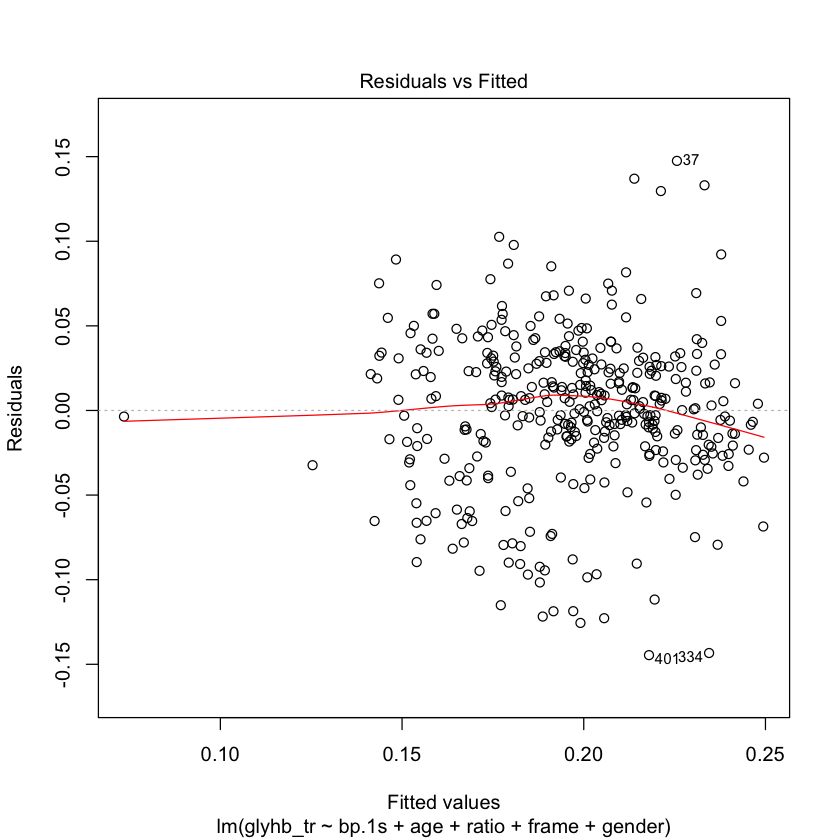

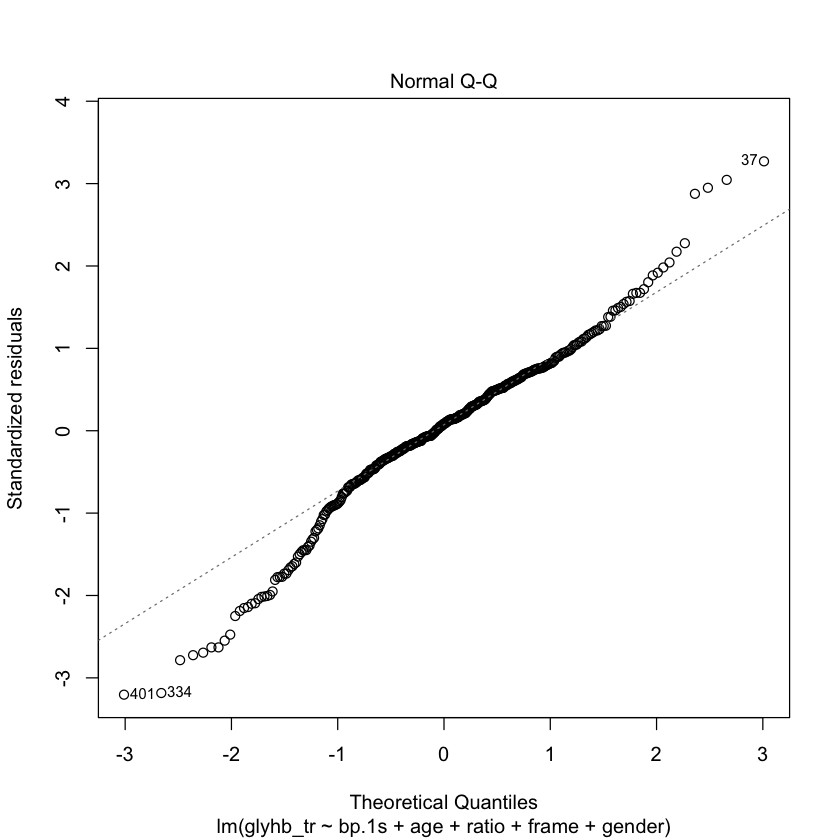

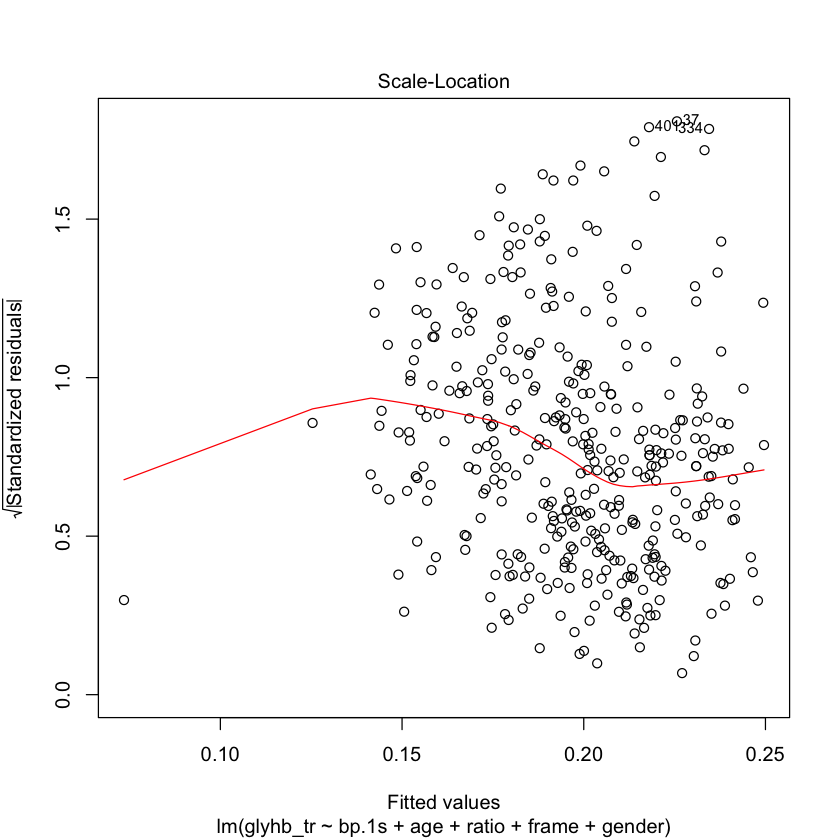

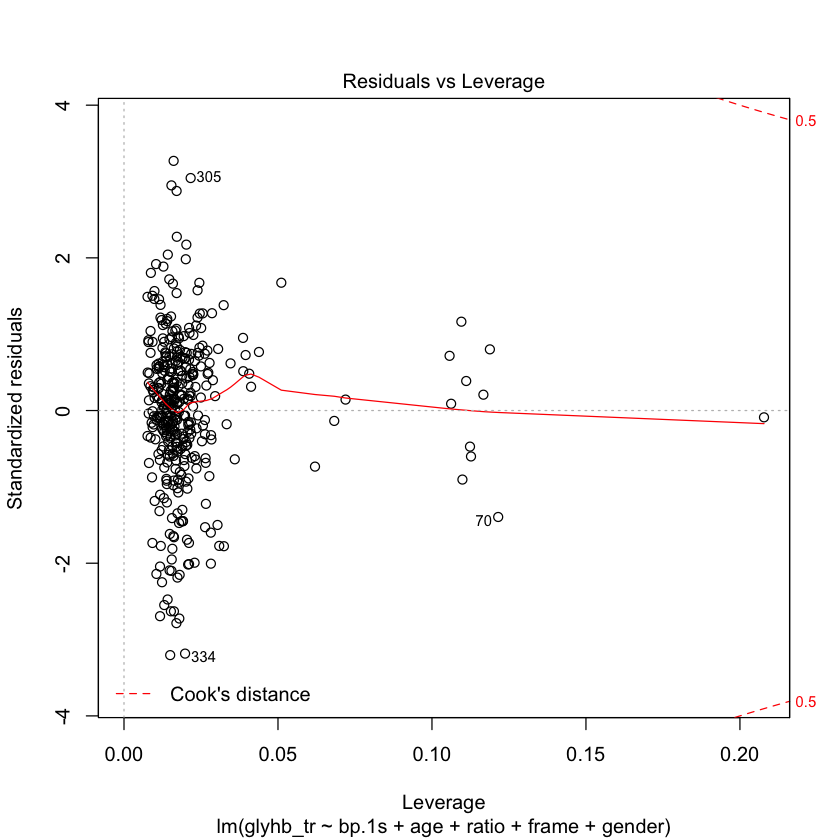

In [56]:
#9 From model 2 dropped gender
mod2<-lm(glyhb_tr~bp.1s+age+ratio+frame+gender)
#Anova with this model kept SSE at 0.777 excludng gender
#Anova with model without frame has SSE at 0.785 so according to anova I will drop gender
anova(mod2)
summary(mod2)

plot(mod2)


In [59]:
#9) mod3<-lm(glyhb_tr~age+ratio+frame+bp.1s)
anova(mod3)
summary(mod3)

AIC(mod3)
BIC(mod3)
#Dropping frame I get a SSe of 0.785
#Dropping bp.1s I get an SSE of 0.7929, It would of been better to drop frame

mod4<-lm(glyhb_tr~age+ratio+frame)
summary(mod4)
AIC(mod4)
BIC(mod4)

mod5<-lm(glyhb_tr~age+ratio+frame+age:frame)
summary(mod5)
AIC(mod4)
BIC(mod4)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
age,1,0.168487629,0.168487629,81.694449,8.436800e-18
ratio,1,0.081784252,0.081784252,39.654659,8.442266e-10
frame,3,0.008852796,0.002950932,1.430816,2.333719e-01
bp.1s,1,0.002672236,0.002672236,1.295685,2.557258e-01
Residuals,377,0.777529404,0.002062412,NA,NA



Call:
lm(formula = glyhb_tr ~ age + ratio + frame + bp.1s)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.145077 -0.020987  0.003532  0.027730  0.148468 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.3072474  0.0215090  14.285  < 2e-16 ***
age         -0.0009937  0.0001616  -6.148 2.01e-09 ***
ratio       -0.0078542  0.0013809  -5.688 2.59e-08 ***
framelarge  -0.0169719  0.0151155  -1.123    0.262    
framemedium -0.0100873  0.0148579  -0.679    0.498    
framesmall  -0.0043435  0.0152366  -0.285    0.776    
bp.1s       -0.0001299  0.0001141  -1.138    0.256    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.04541 on 377 degrees of freedom
  (19 observations deleted due to missingness)
Multiple R-squared:  0.2519,	Adjusted R-squared:   0.24 
F-statistic: 21.16 on 6 and 377 DF,  p-value: < 2.2e-16


[1] -1275.929

[1] -1244.324


Call:
lm(formula = glyhb_tr ~ age + ratio + frame)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.145041 -0.020437  0.002838  0.027483  0.149848 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.2960631  0.0166287  17.804  < 2e-16 ***
age         -0.0010848  0.0001461  -7.423 7.47e-13 ***
ratio       -0.0077330  0.0013811  -5.599 4.11e-08 ***
framelarge  -0.0199590  0.0144877  -1.378    0.169    
framemedium -0.0123822  0.0142013  -0.872    0.384    
framesmall  -0.0067563  0.0145654  -0.464    0.643    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.0455 on 383 degrees of freedom
  (14 observations deleted due to missingness)
Multiple R-squared:  0.2469,	Adjusted R-squared:  0.237 
F-statistic: 25.11 on 5 and 383 DF,  p-value: < 2.2e-16


[1] -1292.149

[1] -1264.404


Call:
lm(formula = glyhb_tr ~ age + ratio + frame + age:frame)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.142915 -0.020948  0.002957  0.027974  0.146889 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)      0.2980768  0.0338565   8.804   <2e-16 ***
age             -0.0011394  0.0005606  -2.032   0.0428 *  
ratio           -0.0075171  0.0013842  -5.431    1e-07 ***
framelarge      -0.0416434  0.0369671  -1.126   0.2607    
framemedium     -0.0010547  0.0350389  -0.030   0.9760    
framesmall      -0.0173176  0.0358082  -0.484   0.6289    
age:framelarge   0.0004065  0.0006302   0.645   0.5192    
age:framemedium -0.0002599  0.0006033  -0.431   0.6668    
age:framesmall   0.0002381  0.0006306   0.378   0.7060    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.04545 on 380 degrees of freedom
  (14 observations deleted due to missingness)
Multiple R-squared:  0.2545,	Adjusted R-squ

[1] -1292.149

[1] -1264.404

## Processing of the data

In [80]:
#Drop id, bp.2s, bp.2d from data
drops=c("id","bp.2s","bp.2d")
diab<-diab[,!(names(diab)%in%drops)]

#glyhb values are the inverse of the function
diab$glyhb=(1/glyhb)

#Drop cases having NA's
index.na=apply(is.na(diab),1,any)
diab_2=diab[index.na==FALSE,]
any(is.na(diab_2))
table(diab_2$frame)

#17. Draw scatterplot matrix and obtain the pairwise correlation matrix for all quantitative variables in the data.
#Comment on their relationships

#drop the factor variables
diabq=diab_2[,!(sapply(diab_2,class)%in%'factor')]

#compute correlation matrix
cor(diabq)


[1] FALSE


        large medium  small 
     9     96    172     98 

,chol,stab.glu,hdl,ratio,glyhb,age,height,weight,bp.1s,bp.1d,waist,hip,time.ppn
chol,1.0000000000,0.17605760,0.18918622,0.47685119,-0.26343397,0.25807515,-0.0726825795,0.05450017,0.20840065,0.17156356,0.11927405,0.07327177,0.0009236077
stab.glu,0.1760576046,1.00000000,-0.15845068,0.29353513,-0.64870423,0.28820616,0.0864302351,0.17918946,0.16181629,0.02867443,0.22720469,0.13333204,-0.0501040985
hdl,0.1891862222,-0.15845068,1.00000000,-0.68325757,0.16866396,0.02624555,-0.0901427069,-0.29760400,0.03436444,0.07630061,-0.28499211,-0.23280194,0.0682288499
ratio,0.4768511857,0.29353513,-0.68325757,1.00000000,-0.35175058,0.16952389,0.0782807237,0.27690932,0.11090086,0.03904864,0.30894469,0.20246310,-0.0500762030
glyhb,-0.2634339697,-0.64870423,0.16866396,-0.35175058,1.00000000,-0.39928744,-0.0435138723,-0.20920504,-0.23886799,-0.05749981,-0.31044490,-0.20008928,-0.0360650342
age,0.2580751516,0.28820616,0.02624555,0.16952389,-0.39928744,1.00000000,-0.0953003330,-0.06523800,0.45236549,0.06562279,0.15068806,-0.00208207,-0.0396297574
height,-0.0726825795,0.08643024,-0.09014271,0.07828072,-0.04351387,-0.09530033,1.0000000000,0.24609012,-0.04709996,0.03839032,0.04503357,-0.11762914,-0.0001877958
weight,0.0545001654,0.17918946,-0.29760400,0.27690932,-0.20920504,-0.06523800,0.2460901156,1.00000000,0.08797282,0.17190112,0.85176414,0.82931024,-0.0577287098
bp.1s,0.2084006482,0.16181629,0.03436444,0.11090086,-0.23886799,0.45236549,-0.0470999583,0.08797282,1.00000000,0.61104157,0.20342942,0.14425492,-0.0814349347
bp.1d,0.1715635556,0.02867443,0.07630061,0.03904864,-0.05749981,0.06562279,0.0383903197,0.17190112,0.61104157,1.00000000,0.17056560,0.15538918,-0.0669496556


[1] FALSE FALSE FALSE FALSE FALSE  TRUE FALSE  TRUE FALSE FALSE  TRUE FALSE
[13] FALSE FALSE FALSE FALSE

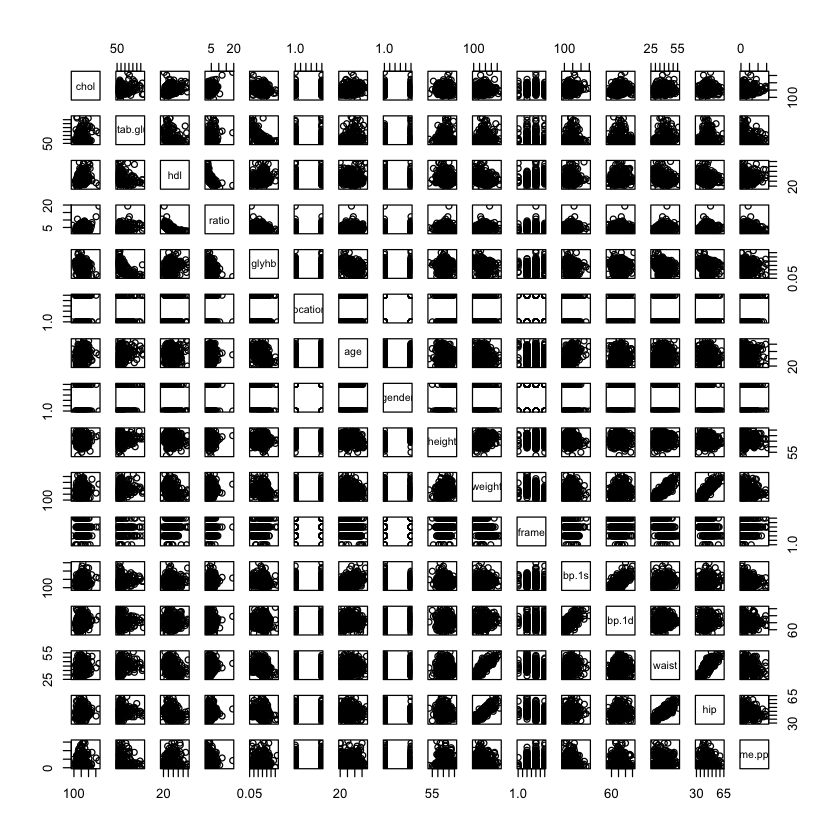

In [83]:
#Draw scatterplot matrix
plot(diab_2)

## Selection of first-order and second-order effects

In [15]:
mod6<-lm(glyhb~., data=diab_2)
summary(mod6)

ERROR: Error in is.data.frame(data): object 'diab_2' not found


In [89]:
#install.packages(leaps)
library(leaps)
subset=regsubsets(glyhb~.,data=diab_2, nbest=1, nvmax=16)
sumsub=summary(subset)
sumsub$rsq
sumsub$adjr2

## BIC
## sample size 
n=nrow(diab_2) 
## number of coefficients in each model: p
p.m=as.integer(as.numeric(rownames(sumsub$which))+1) 
bic = n*log(sumsub$rss/n) + (log(n))*p.m

## AIC 
aic = n*log(sumsub$rss/n) + 2*p.m

## table of all criteria values
sumtable = cbind(sumsub$which,sumsub$rsq,sumsub$adjr2,bic,aic)
colnames(sumtable)=c(colnames(sumsub$which), "R^2", "R^2_a", "BIC", "AIC")
round(sumtable,3) ## round the results to three decimals

## get the index for the best model within each size group (the first one in the group)
index.best=c(which.max(sumsub$rsq),which.max(sumsub$adjr2),which.min(bic),which.min(aic))



ERROR: Error in library(leaps): there is no package called ‘leaps’


In [ ]:
#stepwise procedure-forward selection
##### Forward selection  ###################
fit = lm(glyhb~1, data=diab_2)  ## initial model: none-model with only intercept term
fita = lm(glyhb~., data=diab_2)
step = stepAIC(fit,scope=list(upper=formula(fita), lower=~1), direction="forward", k=2)

##### Forward selection with interactions ##########
fit.0 =lm(glyhb~1, data=diab_2) ## none-model without X variable
fit.2 = lm(glyhb~.^2, data=diab_2)  ## full model with all 2-way interactions
step = stepAIC(fit.0,scope=list(upper=formula(fit.2), lower=~1),direction="forward", k=2)


